# Art Auction Data: Exploratory Data Analysis

I'm working towards an ML project that models painting prices in the secondary art market based on a variety of artwork features. I've finished some of the heavy (and not-so-heavy) lifting on the front end--[writing a script to scrape the data](https://github.com/zrottman/art_auction/blob/main/scraper.py), and [pre-processing](https://github.com/zrottman/art_auction/blob/main/01_data-preprocessing.ipynb) and [cleaning](https://github.com/zrottman/art_auction/blob/main/02_data-cleaning.ipynb) the scraped data, which contains 53,034 auction result records for some 141 artists.

Now it's time to embark on some good, old-fashioned EDA so I can get a better sense of what we're working with here and gain a little intuition about how realized auction price may or may not correlate with some of the features that I've either scraped or engineered.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Load data
data = pd.read_csv('data/auction_data_cleaned.csv', index_col=0)
data.head()

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Fillette au bateau (Maya),1938,oil on canvas,73.3 x 60 cm,"Mar 1, 2023",Sotheby's• London,Modern & Contemporary Evening Auction,Lot6002,NaN,...,2023,NaN,4398.00,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Homme assis,1969,oil on panel laid down on cradled panel,28.7 x 56.6 cm,"Nov 30, 2022",Christie's,Live Auction 19901 20th/21st Century Art Eveni...,Lot35,"HK\$10,650,000• US\$1,363,489",...,2022,1363489.0,1624.42,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Buffalo Bill,1911,oil and sand on canvas,33.3 x 46.3 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot12,"US\$12,412,500",...,2022,12412500.0,1541.79,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Homme à la moustache,1970,oil and oil stick on panel,65.1 x 129.4 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot30,"US\$4,620,000",...,2022,4620000.0,8423.94,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Le peintre et son modèle,1964,oil and ripolin on canvas,195.0 x 130.0 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot36,"US\$10,351,500",...,2022,10351500.0,25350.00,NaN,0,49.0,NaN,83.0,58.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53034 entries, 0 to 53033
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   artist_name                       53034 non-null  object 
 1   title                             51646 non-null  object 
 2   date                              39291 non-null  object 
 3   medium                            53020 non-null  object 
 4   dims                              51643 non-null  object 
 5   auction_date                      53034 non-null  object 
 6   auction_house                     53034 non-null  object 
 7   auction_sale                      46153 non-null  object 
 8   auction_lot                       53034 non-null  object 
 9   price_realized                    40799 non-null  object 
 10  estimate                          45383 non-null  object 
 11  bought_in                         12233 non-null  float64
 12  Nati

In [4]:
# Set style
sns.set_style('white')

# Axis Variables
titlefontsize = 16

# Boxplot Variables
boxprops = {'edgecolor':'black', 'linewidth':1}
whiskerprops = {'color':'black', 'linewidth':1}
medianprops = {'color': 'black', 'linewidth':1}
flierprops = {'marker': 'o', 'markerfacecolor': '#EEEEEE', 'markeredgecolor': 'black', 'alpha':0.6}


# Establish palette
colors = {
    'red': '#FE5F55',
    'blue': '#208AAE',
    'green': '#18A999',
    'yellow': '#F0F3BD',
    'darkblue': '#00072D',
    'purple': '#9368B7',
    'orange': '#F2B880',
    'pink': '#EFC3E6',
    'darkred': '#C44536',
    'darkgreen': '#4B644A',
    'gray': '#DDDDDD',
    'darkgray': '#AAAAAA'
}

colorslist = [c for c in colors.values()]

mypalette = sns.set_palette(sns.color_palette(colorslist), desat=1)
sns.color_palette(colorslist)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6),
 (0.9411764705882353, 0.9529411764705882, 0.7411764705882353),
 (0.0, 0.027450980392156862, 0.17647058823529413),
 (0.5764705882352941, 0.40784313725490196, 0.7176470588235294),
 (0.9490196078431372, 0.7215686274509804, 0.5019607843137255),
 (0.9372549019607843, 0.7647058823529411, 0.9019607843137255),
 (0.7686274509803922, 0.27058823529411763, 0.21176470588235294),
 (0.29411764705882354, 0.39215686274509803, 0.2901960784313726),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666)]

In [5]:
# View columns
data.columns

Index(['artist_name', 'title', 'date', 'medium', 'dims', 'auction_date',
       'auction_house', 'auction_sale', 'auction_lot', 'price_realized',
       'estimate', 'bought_in', 'Nationality', 'Gender', 'birth_year',
       'death_year', 'auction_date_parsed', 'start_date', 'end_date',
       'dims_cm', 'dims_in', 'dims_mm', 'is_diameter', 'width_cm', 'height_cm',
       'depth_cm', 'width_mm', 'height_mm', 'depth_mm', 'width_in',
       'height_in', 'depth_in', 'auction_house_loc', 'auction_house_name',
       'price_realized_USD', 'auction_year',
       'price_realized_USD_constant_2022', 'area_cm_sq', 'volume_cm_cu',
       'living', 'years_after_death_of_auction', 'artist_age_at_auction',
       'artist_age_at_artwork_completion', 'artwork_age_at_auction',
       'years_ago_of_auction'],
      dtype='object')

In [6]:
# Parse `auction_date_parsed` as DateTime object
data['auction_date_parsed'] = pd.to_datetime(data['auction_date_parsed'])

# The Dataset and its Features
Here's a sample of what the dataset looks like:

In [7]:
data.sample(10, random_state=123)

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
31937,Salvador Dali,"The persistence of memory ,\nThe persistence o...",NaN,tapestry,162.56 x 140.97 cm,"Aug 12, 2017",Michaan's Auctions • Alameda,August Estate Auction,Lot420,US\$750,...,2017,8.954441e+02,22916.083200,NaN,0,28.0,NaN,NaN,NaN,6
7514,Gerhard Richter,ABSTRAKTES BILD 802-3,NaN,oil on canvas,112 by 102 cm,"Sep 30, 2018",Sotheby's,NaN,Lot1079,"HK\$27,720,000 • US\$3,540,939",...,2018,4.126820e+06,11424.000000,NaN,1,NaN,86.0,NaN,NaN,5
18591,Ed Ruscha,Regal,2001,dry pigment and acrylic on museum board,101.9 x 152.4 cm,"May 16, 2019",Christie's • New York,Post-War and Contemporary Art Morning Session,Lot635,"US\$927,000",...,2019,1.061153e+06,15529.560000,NaN,1,NaN,82.0,64.0,18.0,4
39383,Takashi Murakami,Superflat Monogram,2003,acrylic on canvas mounted on board,178.31 x 178.31 in,"May 15, 2008",Phillips de Pury & Company• New York,Contemporary Art Part I,Lot110,"US\$724,200",...,2008,9.843836e+05,205125.112975,NaN,1,NaN,46.0,41.0,5.0,15
35906,Bernard Buffet,L'atelier,1949,oil on canvas,66.04 x 91.44 in,"May 1, 1996",Christie's • New York,"Impressionist & Modern Paintings, Drawings & S...",Lot246,"US\$38,000",...,1996,7.087884e+04,38959.261436,NaN,1,NaN,68.0,21.0,47.0,27
21611,Chu Teh-Chun,Mirage èa l'aube (Mirage at Dawn),1920-2014,oil on canvas,130 x 195 cm,"May 30, 2015","Christie's • Hong Kong, HKCEC Grand Hall",Asian 20th Century & Contemporary Art (Evening...,Lot60,"HK\$15,640,000 • US\$2,026,991",...,2015,2.502812e+06,25350.000000,NaN,0,1.0,NaN,NaN,NaN,8
25757,Keith Haring,Untitled,1983,Oil on panel,88.9 x 200.03 in,"Dec 8, 1998",Binoche • Paris,Binoche,Lot42,NaN,...,1998,NaN,114726.654417,NaN,0,8.0,NaN,25.0,15.0,25
3388,Andy Warhol,Key Service (Positive),1986,synthetic polymer and silkscreen ink on canvas,50.8 x 40.6 cm,"Nov 12, 2012",Christie's,Andy Warhol at Christie's Sold to Benefit the ...,Lot292,"US\$62,500",...,2012,7.966644e+04,2062.480000,NaN,0,25.0,NaN,58.0,26.0,11
20841,Pierre-Auguste Renoir,Paysage aux collettes,NaN,oil on canvas,45.72 x 30.48 in,"May 28, 1997",Bukowskis• Stockholm,International Auction,Lot303,"SEK695,000 • US\$90,541",...,1997,1.650921e+05,8990.598793,NaN,0,78.0,NaN,NaN,NaN,26
48705,Julian Schnabel,Untitled,1981,"ink, sand and gesso on torn paper",96.52 x 124.46 in,"Oct 14, 1998",Christie's • Los Angeles,20th Century & Contemporary Art,Lot100,"US\$17,000",...,1998,3.052230e+04,77502.291447,NaN,1,NaN,47.0,30.0,17.0,25


And here's some background on the features it includes:

### Scraped Features
#### Artwork Information
-`artist_name`: The artist's name, as it appears in the original list of artist names input into the scraping script
- `title`: The artwork's title
- `medium`: The artwork's medium
- `date`: The artwork's attributed date, which in some cases is a span (e.g., 1956-1958) or an estimate (e.g., 1920s, circa 1940s-1950s, 16th century, etc.)
- `dims`: Artwork's attributed dimensions. Because these are paintings, in most cases there are two measurements for width and height, but in some cases objects include a depth measurement or a radius measurment (for circular works).

#### Auction Information
- `auction_date`: Date of auction, in `Month DD, YYYY` format
- `auction_house`: Name of auction house (e.g., Sotheby's)
- `auction_sale`: Name of sale (e.g., Contemporary Evening Sale)
- `auction_lot`: Number of auction lot
- `price_realized`: Realized price in nominal currency. Includes transaction currency and, if not USD, conversion to USD
- `estimate`: Range of auction house estimate for the work.
- `bought_in`: Whether or not work was bought in (i.e., artwork goes unsold)


### Merged Features
The following features are merged from the [Museum of Modern Art's collection dataset](https://github.com/MuseumofModernArt/collection):
- `Nationality`: The artist's nationality
- `Gender`: The artist's gender
- `birth_year`: Year of the artist's birth
- `death_year`: Year of the artist's death (when applicable)


### Parsed Features
#### Dates
- `auction_date_parsed`: Conversion of `date` field to DateTime object
- `start_date`: Year in which artwork was begun (identical to `end_date` in cases where `date` is a single year)
- `end_date`: Year in which artwork was completed (identical to `start_date` in cases where `date` is a single year)

#### Dimensions
- `dims_cm`: Extraction from `dims` of measurements denominated in cm
- `dims_mm`: Extraction from `dims` of measurements denominated in mm
- `dims_in`: Extraction from `dims` of measurements denominated in in
- `is_diameter`: Boolean for whether a given measurement is indicated to be a diameter
- `width_cm`: Width measurement extracted from `dims_cm` or computed from `dims_mm` or `dims_in`
- `height_cm`: Height measurement extracted from `dims_cm` or computed from `dims_mm` or `dims_in`
- `depth_cm`: Depth measurement extracted from `dims_cm` or computed from `dims_mm` or `dims_in`
- `width_mm`: Width measurement extracted from `dims_mm`
- `height_mm`: Height measurement extracted from `dims_mm`
- `depth_mm`: Depth measurement extracted from `dims_mm`
- `width_in`: Width measurement extracted from `dims_in`
- `height_in`: Height measurement extracted from `dims_in`
- `depth_in`: Depth measurement extracted from `dims_in`

#### Auction Information
- `auction_house_loc`: Location of auction (when applicable), as extracted from `auction_house`
- `auction_house_name`: Name of auction house, extracted from `auction_house`
- `price_realized_USD`: Nominal USD realized price, extracted from `price_realized`
- `auction_year`: Year, reformatted from `auction_date`


### Engineered Features
#### Auction Information
- `price_realized_USD_constant_2022`: Conversion of `price_realized_USD` to constant 2022 dollars using `cpi` library

#### Artwork
- `area_cm_sq`: Artwork size as surface area, computed from `width_cm` and `height_cm` (or `width_cm` if a diamter measurement)
- `volume_cm_cu`: Artwork size as volume for three-dimensional works, computer from `width_cm`, `height_cm`, and `depth_cm`

#### Artist
- `living`: Boolean for whether an artist was living at the time of auction
- `years_after_death_of_auction`: Number of years after artist's death that the auction occurred (in cases when the artist was no longer alive at the time of auction)
- `artist_age_at_auction`: Artist's age at the time of auction (in cases where artist was living at the time of auction)
- `artist_age_at_artwork_completion`: Artist's age at the time of artwork's completion. Proxy for stage of artist's career.
- `artwork_age_at_auction`: Age of artwork in years at time of auction
- `years_ago_of_auction`: Years elapsed from auction to present

Note that I won't be working with most of the raw, scraped features.

In [8]:
# Isolate columns we want
cols = [
    'artist_name', 'Nationality', 'Gender', 'birth_year', 'death_year',
    'title', 'medium', 'start_date', 'end_date',
    'dims', 'dims_cm','is_diameter',
    'width_cm', 'height_cm','depth_cm',
    'area_cm_sq', 'volume_cm_cu',
    'auction_date_parsed','auction_year','auction_house_loc', 'auction_house_name',
    'price_realized_USD','price_realized_USD_constant_2022','bought_in',   
    'living', 'years_after_death_of_auction', 'artist_age_at_auction',
    'artist_age_at_artwork_completion', 'artwork_age_at_auction',
    'years_ago_of_auction'
]

data = data[cols]
data.head()

,artist_name,Nationality,Gender,birth_year,death_year,title,medium,start_date,end_date,dims,...,auction_house_name,price_realized_USD,price_realized_USD_constant_2022,bought_in,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Spanish,Male,1881.0,1973.0,Fillette au bateau (Maya),oil on canvas,1938.0,1938.0,73.3 x 60 cm,...,Sotheby's,NaN,NaN,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme assis,oil on panel laid down on cradled panel,1969.0,1969.0,28.7 x 56.6 cm,...,Christie's,1363489.0,1363489.0,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Spanish,Male,1881.0,1973.0,Buffalo Bill,oil and sand on canvas,1911.0,1911.0,33.3 x 46.3 cm,...,Christie's,12412500.0,12412500.0,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme à la moustache,oil and oil stick on panel,1970.0,1970.0,65.1 x 129.4 cm,...,Christie's,4620000.0,4620000.0,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Spanish,Male,1881.0,1973.0,Le peintre et son modèle,oil and ripolin on canvas,1964.0,1964.0,195.0 x 130.0 cm,...,Christie's,10351500.0,10351500.0,NaN,0,49.0,NaN,83.0,58.0,1


# A Note on Methodology: Constant vs. Nominal Dollars
In most of what follows, I've decided to do preliminary data analysis for patterns and trends using constant 2022 dollars rather than nominal dollars from each observation's given auction year. My reason for doing this is to eliminate the inflation variable as much as possible so that we can attempt to measure realized price accoring to a single standard. Otherwise, any attempt to look for correlations between a certain variable and price realized would be confounded by auction date. For instance, consider an artwork sold in 1989 for a relatively high price and an artwork solid in 2020 for a relatively low price: due to inflaction, these two prices might be the same, and we will have lost the ability to see their difference. We want to eliminate this possibility to the extent that we can.

Not always, though. Ultimately I do want my model to predict prices in nominal amounts--that is, I want the model to predict the price for a work sold in 1990 in nominal 1990 dollars. But again, my sense is that I'll have an easier time understanding general trends and patterns in the data if I adjust for inflation. As a result, I'll use the `price_realized_USD_constant_2022` feature that I engineered so that I'm dealing with constant 2022 USD amounts.

# Takeaways

## 1. Price Varies by Artist

Based on some limited domain experience, my first intuition is that artist name will be the single most important factor in determining price. Which makes sense: Warhol will fall into one price bracket, while new MFAs will fall into another price bracket.

Let's take a look at the artists most represented in this dataset by auction count, and then compare their realized price distributions (using constant 2022 dollars):

In [9]:
top_artists_by_count = (
    data
    .groupby(['artist_name'])['price_realized_USD']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

top_artists_by_count

artist_name
Andy Warhol              2824
Bernard Buffet           1605
Pierre-Auguste Renoir    1475
Gerhard Richter          1213
Sam Francis              1159
Pablo Picasso            1026
Yayoi Kusama             1007
Marc Chagall              927
Zao Wou-Ki                878
Damien Hirst              854
Name: price_realized_USD, dtype: int64

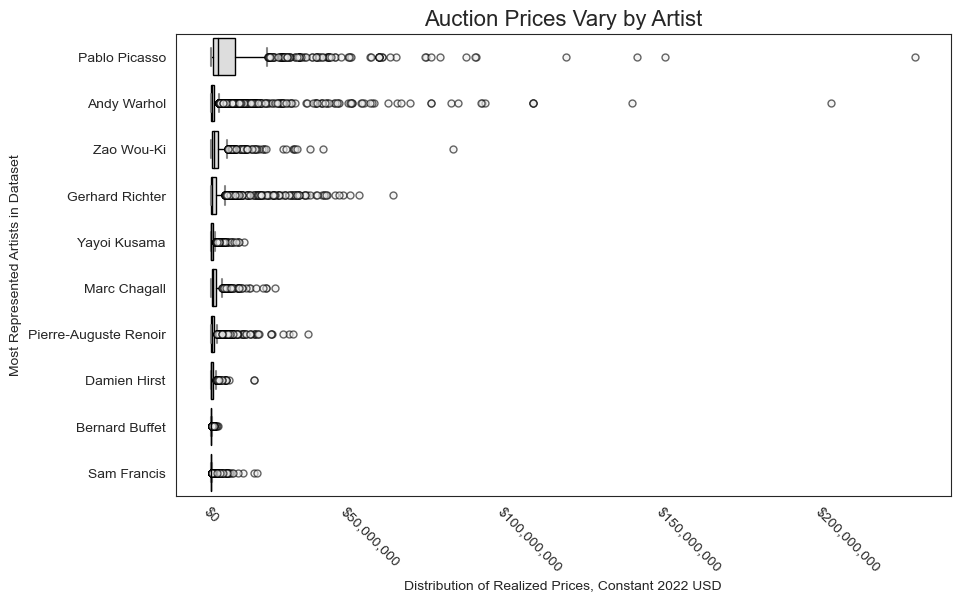

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    data=data[data['artist_name'].isin(top_artists_by_count.index)],
    y='artist_name',
    x='price_realized_USD_constant_2022',
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Auction Prices Vary by Artist', fontsize=titlefontsize)
ax.set_xlabel('Distribution of Realized Prices, Constant 2022 USD')
ax.set_ylabel('Most Represented Artists in Dataset');

The first thing to note here is that evidently auction results are *not* distributed normally--not be a long shot. The realized price distribution for all the artists here, Warhol and Picasso in particular, have an aggressive positive skew, with a huge number of outliers--including (I was shocked to discover) a Warhol work that sold for close to $200M.

Let's check again without the fliers.

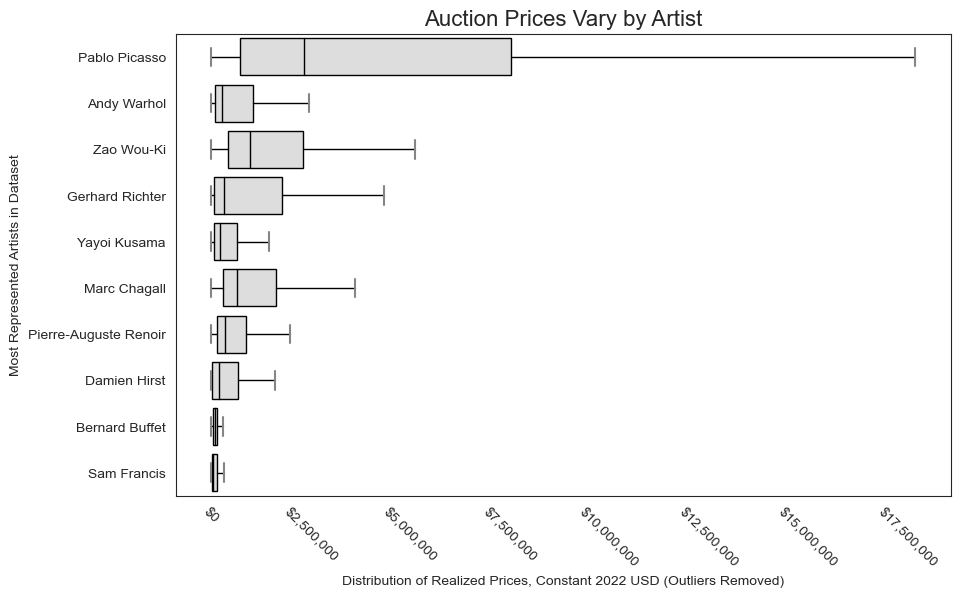

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    data=data[data['artist_name'].isin(top_artists_by_count.index)],
    y='artist_name',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops

)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Auction Prices Vary by Artist', fontsize=titlefontsize)
ax.set_xlabel('Distribution of Realized Prices, Constant 2022 USD (Outliers Removed)')
ax.set_ylabel('Most Represented Artists in Dataset');

Once we get rid of the outliers, we can see more clearly just how much variance there is from one artist market to the next.

## 2. Individual Artist Markets Vary

Another way we can examine this question of individual artist markets is to look at whether the correlations between realized price and certain features--painting size, for instance, or painting age at the time of auction--behave differently according to artist. In other words, perhaps for some artists size correlates strongly with realized price while for others it may not. Again, in order to resolve the inflation issue (since we're looking at auction results from a nearly 40-year period), I'll use constant 2022 dollars as the target variable.

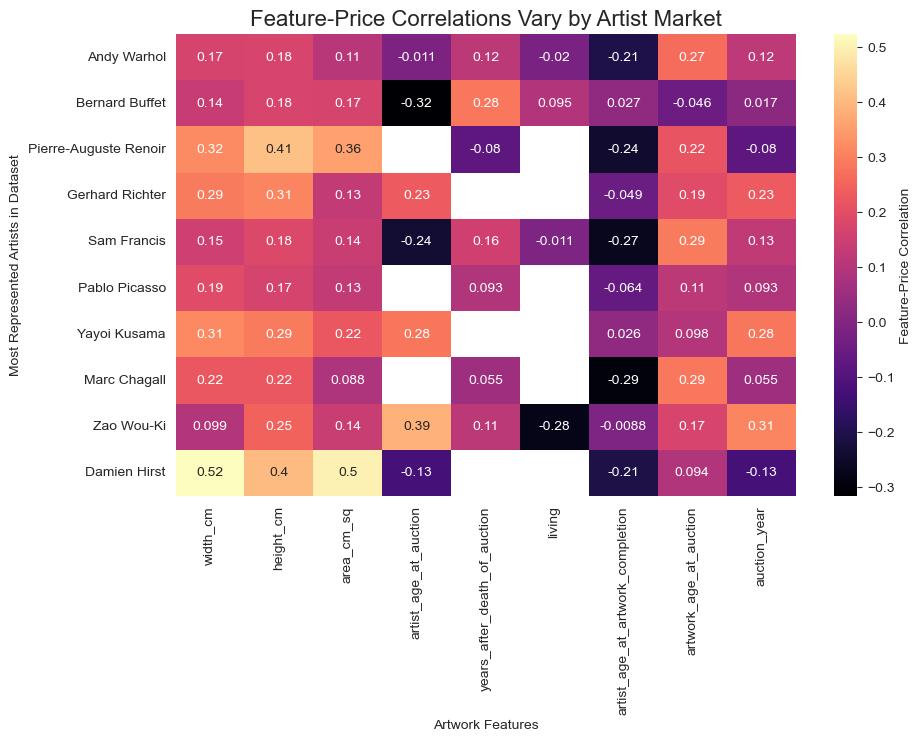

In [12]:
# Isolate columns of interest
cols = ['width_cm', 'height_cm', 'area_cm_sq',
       'artist_age_at_auction', 'years_after_death_of_auction', 'living',
       'artist_age_at_artwork_completion', 'artwork_age_at_auction',
       'auction_year', 'price_realized_USD_constant_2022']

# Initalize output variable
corr_results = []

# Loop through 15 top-selling artists in dataset, compute correlation coefficient for each
# feature in `cols` with `price_realized_USD_constant_2022`, and append result to `corr_results`
for artist in top_artists_by_count.index:
    corr_results.append(
        pd.Series(
            data.loc[data['artist_name'] == artist, cols].corr().loc[:, 'price_realized_USD_constant_2022'],
            name=artist
        )
    )

    
# Create DataFrame from the result and visualize with heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    data=pd.DataFrame(data=corr_results, columns=cols).drop(columns='price_realized_USD_constant_2022'), 
    cmap='magma',
    annot=True, 
    ax=ax,
    cbar_kws={'label': 'Feature-Price Correlation'}
)

ax.set_title('Feature-Price Correlations Vary by Artist Market', fontsize=titlefontsize)
ax.set_xlabel('Artwork Features')
ax.set_ylabel('Most Represented Artists in Dataset');

Interestingly, we can see that, for an artist like Damien Hirst, size (width in particular) correlates relatively strongly with realized price, while for an artist like Bernard Buffet or Sam Francis, the correlation is much less pronounced. We can also see that for an artist like Zao Wou-Ki, realized price increases with the artist's age, whereas for Francis or Buffet, the opposite is true.

While the artist's name can of course be included in the model as a feature, to keep things simple for starters my approach will be to try to model an individual artist first. Intuitively this feels especially important since some features are correlated positively for certain artists and negatively for others.

## 3. Prices are Log-Normal
Because the realized price for artworks has such an aggressively positive skew, it turns out looking at the log of realized price effectively normalizes the distribution.

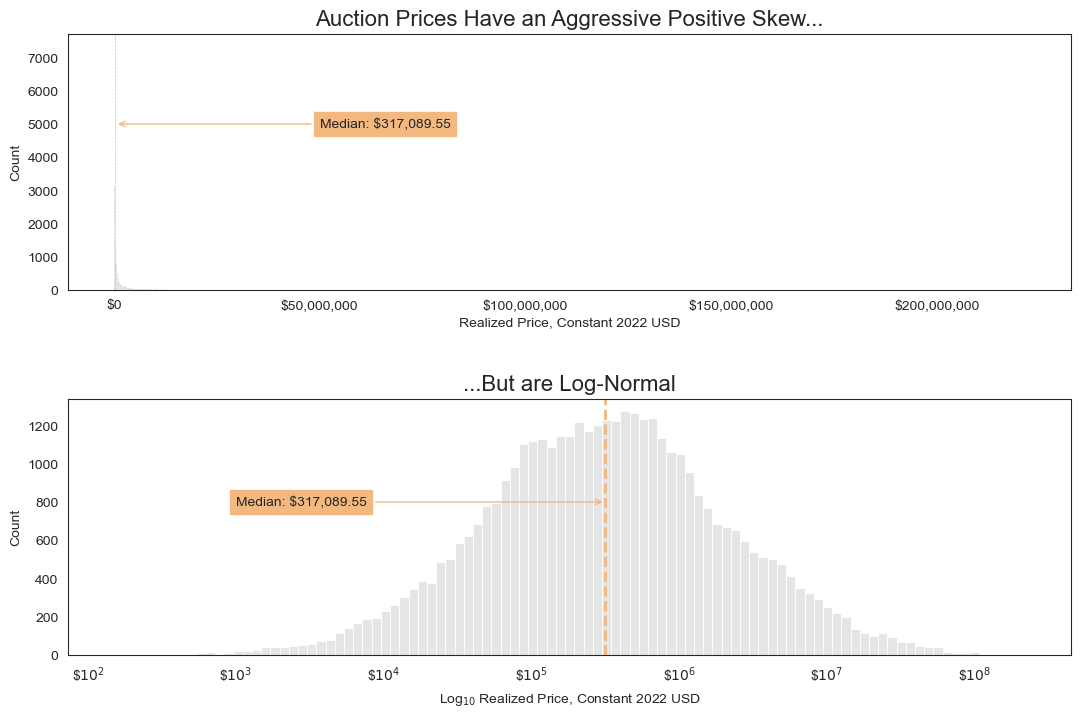

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(
    data=data,
    x='price_realized_USD_constant_2022',
    ax=axs[0],
    color=colors['gray']
)

sns.histplot(
    x=np.log10(data['price_realized_USD_constant_2022']),
    ax=axs[1],
    color=colors['gray']
)

# Median line
median = np.median(data['price_realized_USD_constant_2022'].dropna())
axs[0].axvline(median, color=colors['orange'], ls='--', lw=.5)
axs[0].annotate(
    'Median: ${:,.2f}'.format(median), xy=(median, 5000), 
    xycoords='data', xytext=(50_000_000, 5000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)
axs[1].axvline(np.log10(median), color=colors['orange'], ls='--', lw=2)
axs[1].annotate(
    'Median: ${:,.2f}'.format(median), xy=(np.log10(median), 800), 
    xycoords='data', xytext=(3, 800), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

fig.tight_layout(pad=5)

axs[0].set_title("Auction Prices Have an Aggressive Positive Skew...", fontsize=titlefontsize)
axs[0].set_xlabel("Realized Price, Constant 2022 USD")
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'));

axs[1].set_title("...But are Log-Normal", fontsize=titlefontsize)
axs[1].set_xlabel("Log$_{10}$ Realized Price, Constant 2022 USD")
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

# 4. Artwork Size is Log-Normal, Too
Artwork size (width, height, and area) has a similar positive skew which can be remedied with a logarithmic scale.

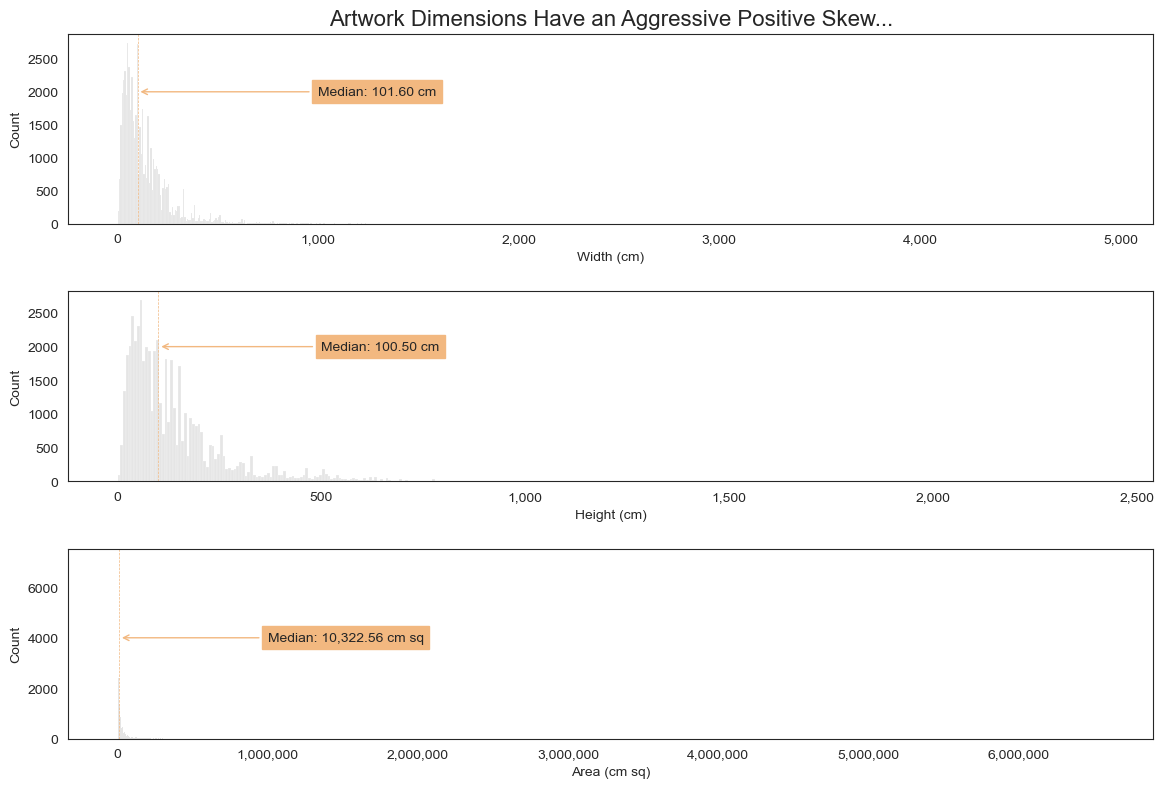

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

sns.histplot(
    data=data,
    x='width_cm',
    ax=axs[0],
    color=colors['gray']
)

sns.histplot(
    data=data,
    x='height_cm',
    ax=axs[1],
    color=colors['gray']
)

sns.histplot(
    data=data,
    x='area_cm_sq',
    ax=axs[2],
    color=colors['gray']
)


# Width Median
width_median = np.median(data['width_cm'].dropna())
axs[0].axvline(width_median, color=colors['orange'], ls='--', lw=.5)
axs[0].annotate(
    'Median: {:,.2f} cm'.format(width_median), xy=(width_median, 2000), 
    xycoords='data', xytext=(1000, 2000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

# Height Median
height_median = np.median(data['height_cm'].dropna())
axs[1].axvline(height_median, color=colors['orange'], ls='--', lw=.5)
axs[1].annotate(
    'Median: {:,.2f} cm'.format(height_median), xy=(height_median, 2000), 
    xycoords='data', xytext=(500, 2000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

# Area Median
area_median = np.median(data['area_cm_sq'].dropna())
axs[2].axvline(area_median, color=colors['orange'], ls='--', lw=.5)
axs[2].annotate(
    'Median: {:,.2f} cm sq'.format(area_median), xy=(area_median, 4000), 
    xycoords='data', xytext=(1_000_000, 4000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)


fig.tight_layout(pad=2)


axs[0].set_title("Artwork Dimensions Have an Aggressive Positive Skew...", fontsize=titlefontsize)
axs[0].set_xlabel("Width (cm)")
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

axs[1].set_xlabel("Height (cm)")
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

axs[2].set_xlabel("Area (cm sq)")
axs[2].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

Compare that with the same distributions on logarithmic scales.

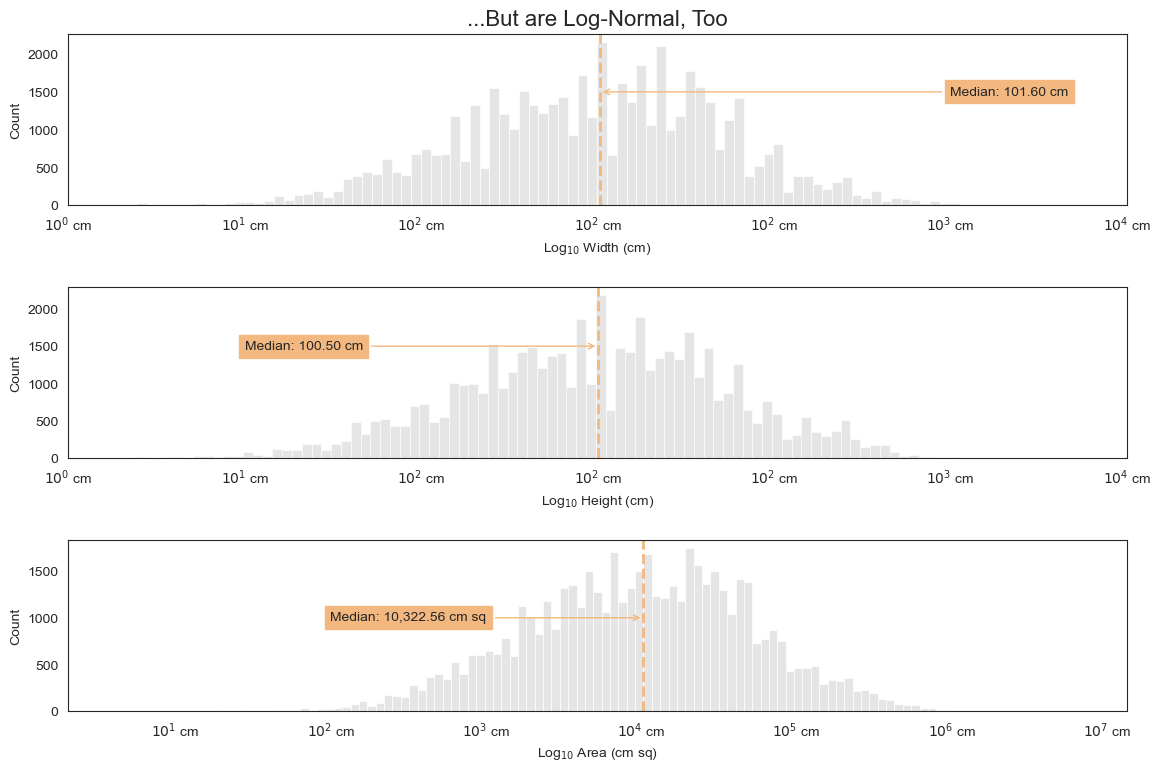

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

sns.histplot(
    x=np.log10(data['width_cm']),
    ax=axs[0],
    color=colors['gray']
)

sns.histplot(
    x=np.log10(data['height_cm']),
    ax=axs[1],
    color=colors['gray']
)

sns.histplot(
    x=np.log10(data['area_cm_sq']),
    ax=axs[2],
    color=colors['gray']
)


# Width Median
width_median = np.median(data['width_cm'].dropna())
axs[0].axvline(np.log10(width_median), color=colors['orange'], ls='--', lw=2)
axs[0].annotate(
    'Median: {:,.2f} cm'.format(width_median), xy=(np.log10(width_median), 1500), 
    xycoords='data', xytext=(3, 1500), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

# Height Median
height_median = np.median(data['height_cm'].dropna())
axs[1].axvline(np.log10(height_median), color=colors['orange'], ls='--', lw=2)
axs[1].annotate(
    'Median: {:,.2f} cm'.format(height_median), xy=(np.log10(height_median), 1500), 
    xycoords='data', xytext=(1, 1500), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)

# Area Median
area_median = np.median(data['area_cm_sq'].dropna())
axs[2].axvline(np.log10(area_median), color=colors['orange'], ls='--', lw=2)
axs[2].annotate(
    'Median: {:,.2f} cm sq'.format(area_median), xy=(np.log10(area_median), 1000), 
    xycoords='data', xytext=(2, 1000), 
    textcoords='data', arrowprops=dict(edgecolor=colors['orange'], arrowstyle='->'), backgroundcolor=colors['orange'],
    horizontalalignment='left', verticalalignment='center'
)


fig.tight_layout(pad=3)


axs[0].set_title("...But are Log-Normal, Too", fontsize=titlefontsize)
axs[0].set_xlabel("Log$_{10}$ Width (cm)")
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$ cm'))
axs[0].set_xlim(.5, 3.5)

axs[1].set_xlabel("Log$_{10}$ Height (cm)")
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$ cm'))
axs[1].set_xlim(.5, 3.5)

axs[2].set_xlabel("Log$_{10}$ Area (cm sq)")
axs[2].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$ cm'));

## 5. Artwork Size and Price Have a Moderate Posive Correlation
Knowing that artwork dimensions and price need to be plotted on logarithmic scales, let's see if there's any meaningful correlation between the two.

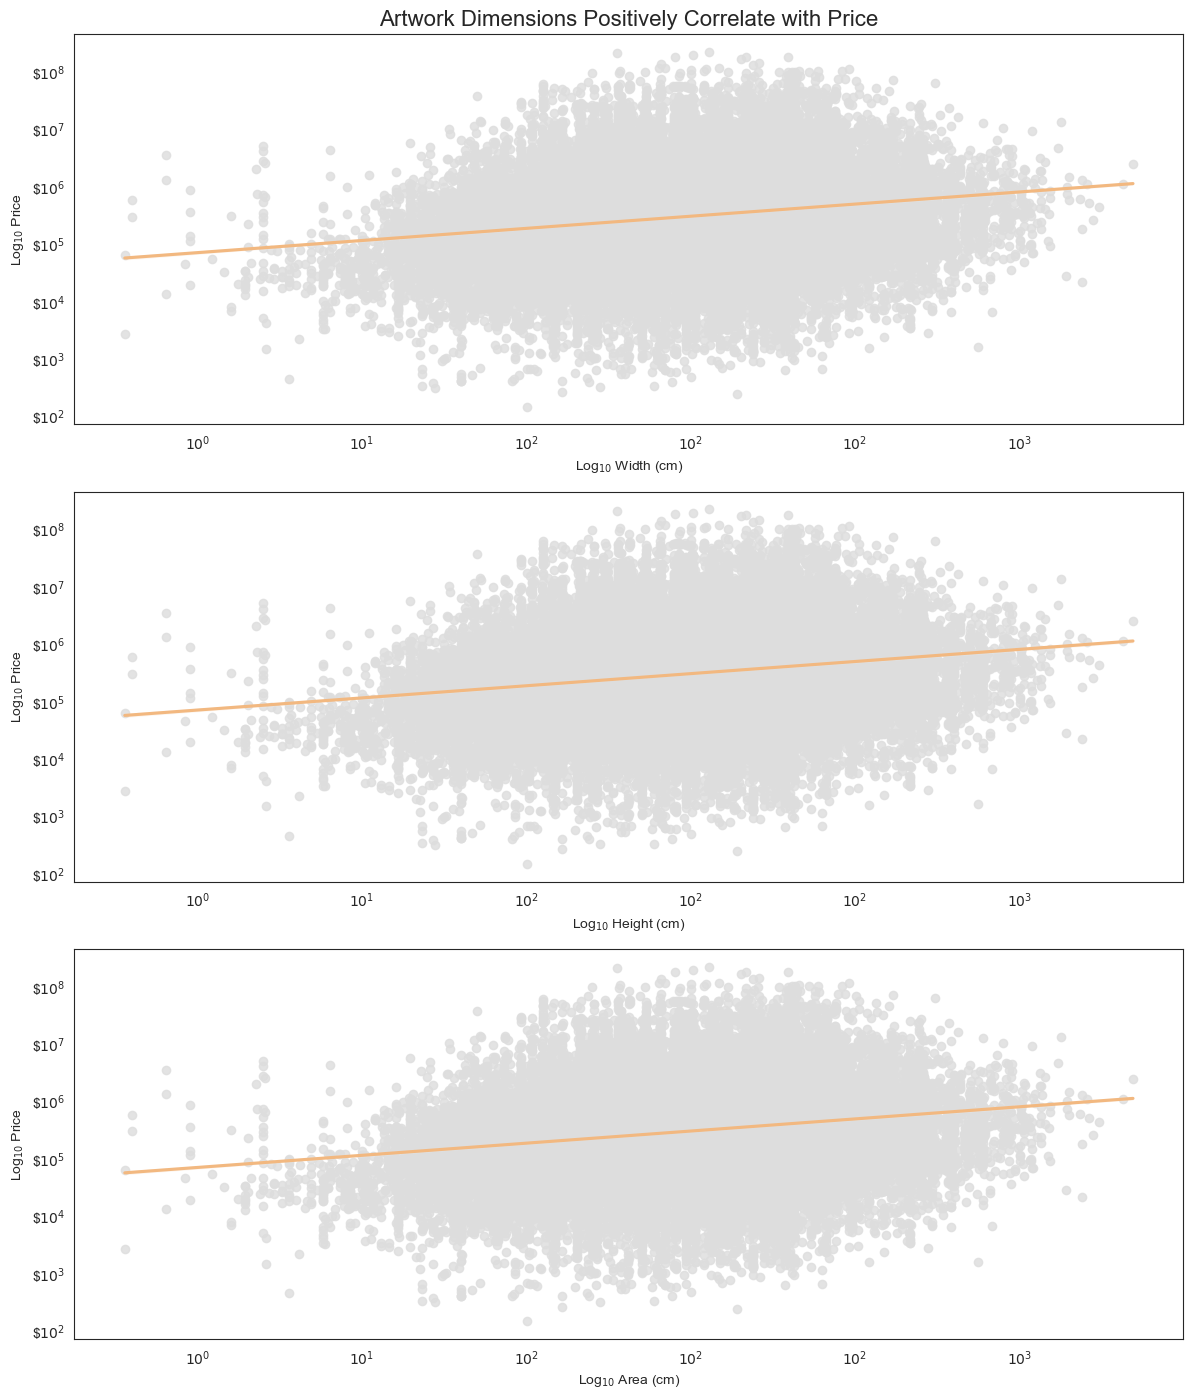

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(12, 14))

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=np.log10(data['width_cm']),
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    ax=axs[0]
)

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=np.log10(data['width_cm']),
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    ax=axs[1]
)

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=np.log10(data['width_cm']),
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    ax=axs[2]
)

fig.tight_layout(pad=2)

axs[0].set_title('Artwork Dimensions Positively Correlate with Price', fontsize=titlefontsize)
axs[0].set_xlabel('Log$_{10}$ Width (cm)')
axs[0].set_ylabel('Log$_{10}$ Price')

axs[1].set_xlabel('Log$_{10}$ Height (cm)')
axs[1].set_ylabel('Log$_{10}$ Price')

axs[2].set_xlabel('Log$_{10}$ Area (cm)')
axs[2].set_ylabel('Log$_{10}$ Price')

for ax in axs:
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'));

Generally, yes, it appears there is some positive correlation between size and price realized.

## 6. Realized Price Varies by Artist Nationality
How does realized price vary with artist nationality?

In [17]:
# Count number of artists for each nationality
cols=['Nationality', 'artist_name']
nationality_counts = data.loc[~data.duplicated(subset=cols), cols]['Nationality'].value_counts()

# Get list of nationalities above threshhold of 5
top_nationalities = nationality_counts[nationality_counts > 5].index

# Create mask for whether nationality is beyond thresshold
is_top_nationality = data['Nationality'].isin(top_nationalities)

# Create new feature for reduced carinality
data.loc[is_top_nationality, 'nationality_reduced'] = data.loc[is_top_nationality, 'Nationality']
data.loc[~is_top_nationality, 'nationality_reduced'] = 'Other'

# Preview results
data[['Nationality', 'nationality_reduced']].sample(10)

,Nationality,nationality_reduced
16749,American,American
39808,French,French
20589,French,French
45599,French,French
32922,Korean,Other
44468,American,American
39630,Austrian,Other
5348,American,American
20100,French,French
39873,French,French


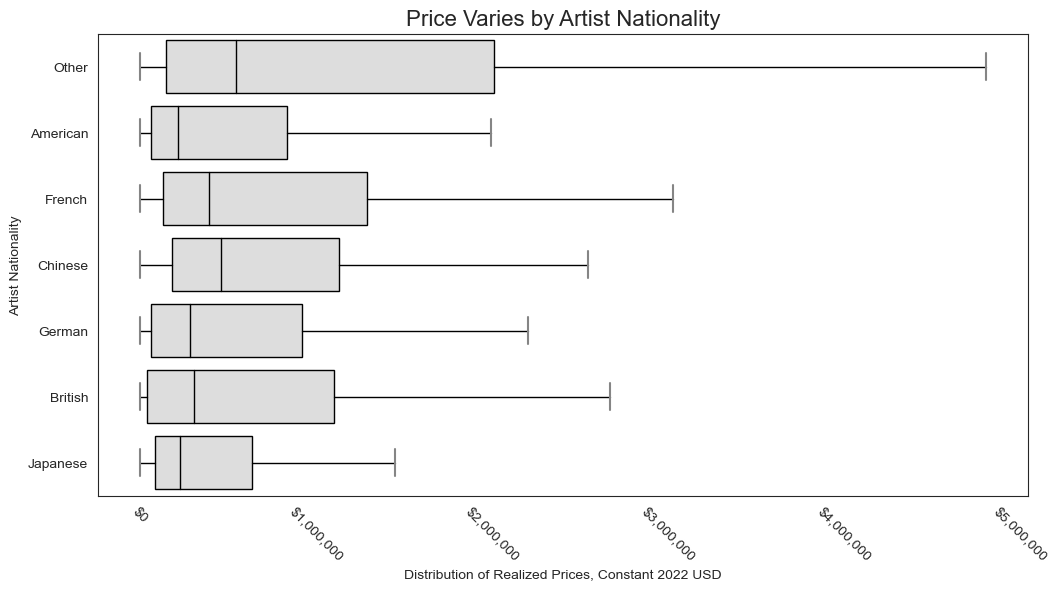

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=data,
    y='nationality_reduced',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops    
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Price Varies by Artist Nationality', fontsize=titlefontsize)
ax.set_xlabel('Distribution of Realized Prices, Constant 2022 USD')
ax.set_ylabel('Artist Nationality');

There do seem to be some differences here, but because I intend to create models for each artist, this feature won't really matter in the end. But still interesting to see!

## 7. Realized Price Doesn't Vary Much by Gender
How does realized price vary by gender? First let's check to see how many women artists this dataset contains:

In [19]:
# Count number of artists for each nationality
cols=['Gender', 'artist_name']
data.loc[~data.duplicated(subset=cols), cols]['Gender'].value_counts()

Male      129
Female     12
Name: Gender, dtype: int64

Not a huge sample, unfortunately, but let's see.

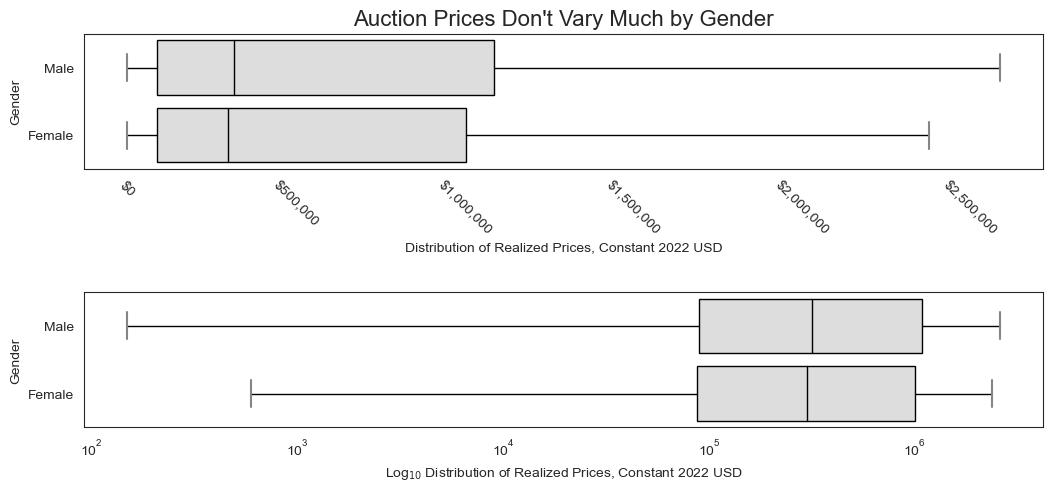

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

sns.boxplot(
    data=data,
    y='Gender',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=axs[0], 
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops    
)

sns.boxplot(
    data=data,
    y='Gender',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=axs[1],
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops    
)

fig.tight_layout(pad=6)

axs[0].set_title('Auction Prices Don\'t Vary Much by Gender', fontsize=titlefontsize)
axs[0].set_xlabel('Distribution of Realized Prices, Constant 2022 USD')
axs[0].set_ylabel('Gender');
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[0].tick_params(axis='x', rotation=-45)

axs[1].set_xlabel('Log$_{10}$ Distribution of Realized Prices, Constant 2022 USD')
axs[1].set_ylabel('Gender');
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'))
axs[1].set_xscale('log')

There is some difference here, but the median realized price is quite close for men and women. Prices for male artists, however, have much more variability as the lower chart shows.

Like `Nationality`, this feature won't really come into play since I'll be making artist-specific models.

## 8. Realized Price Varies by Artist's Generation
How does realized price vary by artist generation? To do this, I'll divide artists into decades by their birth year. For artists born prior to 1800, of which there are a couple in this dataset, I'll lump them into a 'pre-1800' category.

In [21]:
# Create mask for artists born prior to 1800
pre_1800 = data['birth_year'] < 1800

# Reduce cardinality
data['generation'] = data['birth_year'].dropna().astype('str').str[:3] + '0s'
data.loc[pre_1800, 'generation'] = 'Pre-1800'

data[['start_date', 'generation']].sample(20)

,start_date,generation
13467,1970.0,1900s
18436,NaN,1830s
16764,NaN,1920s
40897,1960.0,1920s
32916,NaN,1930s
3401,1978.0,1920s
1741,1984.0,1960s
4907,1981.0,1920s
39758,NaN,1860s
38369,NaN,1920s


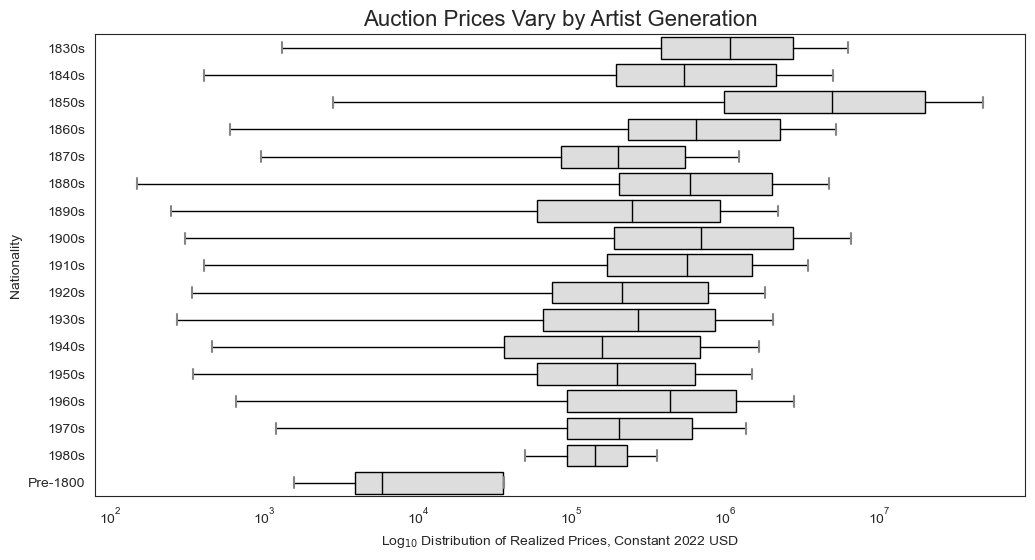

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

# Get generations order
generations = data['generation'].dropna().unique()
generations.sort()

sns.boxplot(
    data=data,
    y='generation',
    x='price_realized_USD_constant_2022',
    order=generations,
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops        
)

ax.set_title('Auction Prices Vary by Artist Generation', fontsize=titlefontsize)
ax.set_xlabel('Log$_{10}$ Distribution of Realized Prices, Constant 2022 USD')
ax.set_ylabel('Nationality')
ax.set_xscale('log');

I'm not sure how useful this information is, since the differences we see can easily be attributed to the artists and the specifics of their markets. For instance, it turns out that, in this dataset, there's only one artist who was born in the 1850s, and that's Van Gogh, who evidently fetches consistently high prices. But as with `Gender` and `Nationality`, this feature won't be a concern of mine when building artist-specific models.

## 9. Realized Price and Artwork Date are Negatively Correlated (Older Works Sell for More)
How does price correlate with an artwork's completion date? Are certain periods of art production more valuable than others? There are a few works in this dataset from prior to 1800--I'll do without those so we can focus on work made from ~1850 to present, which is where the bulk of our data is.

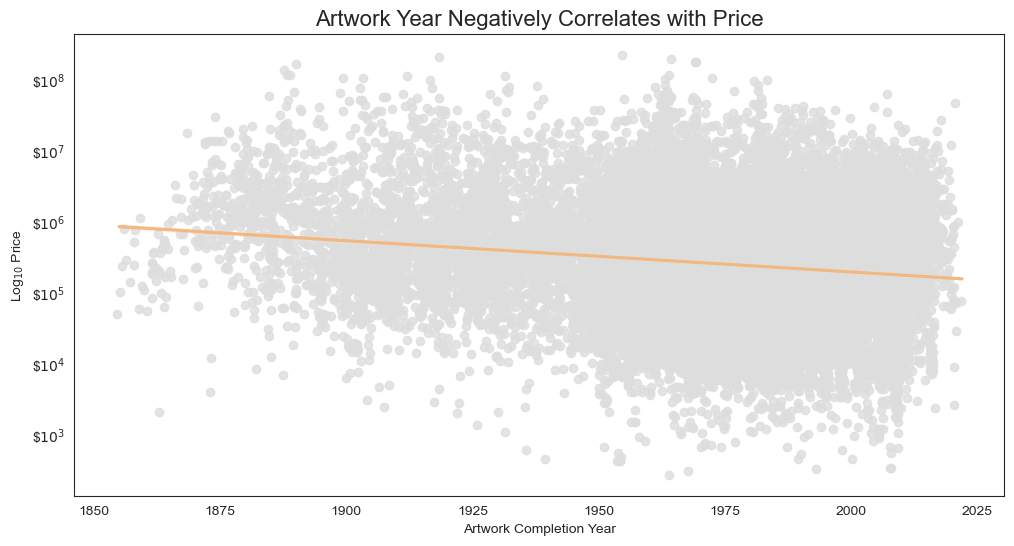

In [23]:
# Mask for work after 1800
post1800 = data['end_date'] > 1800

fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    y=np.log10(data.loc[post1800, 'price_realized_USD_constant_2022']),
    x=data.loc[post1800, 'end_date'],
    line_kws=dict(color=colors['orange']),
    x_jitter=.5,
    color=colors['gray'],
    ax=ax
)

ax.set_title('Artwork Year Negatively Correlates with Price', fontsize=titlefontsize)
ax.set_xlabel('Artwork Completion Year')
ax.set_ylabel('Log$_{10}$ Price')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

Here we see a slight negative correlation between artwork year and price, indicating a value premium put on older works vs. newer ones--makes sense.

## 10. Realized Price and Auction Year are Positively Correlated (Artist Markets Accrue in Value)
How does price correlate with auction year? Because we're using constant 2022 dollars, any changes we see should be a function not of inflation but of value increasing over time.

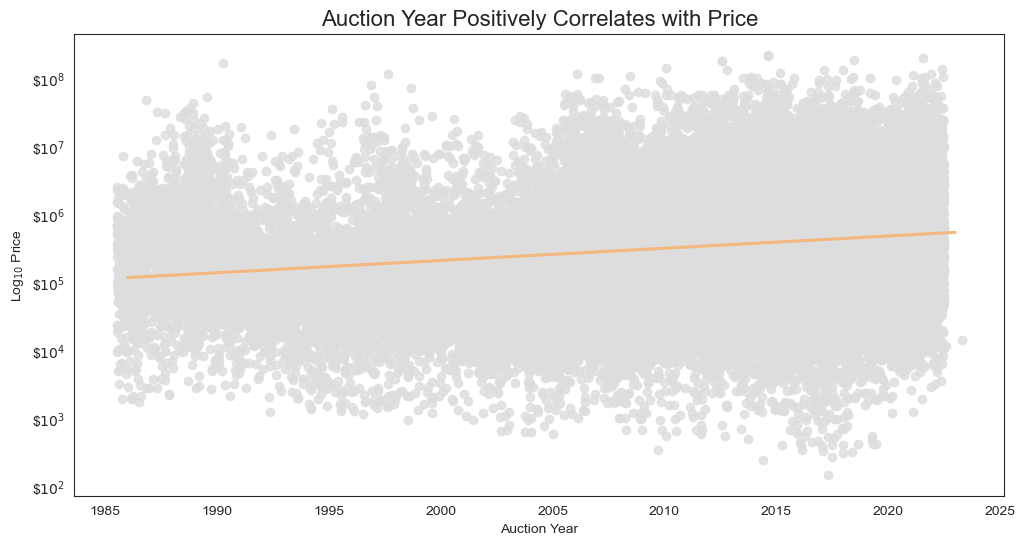

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=data['auction_year'],
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    x_jitter=.5,
    ax=ax
)

ax.set_title('Auction Year Positively Correlates with Price', fontsize=titlefontsize)
ax.set_xlabel('Auction Year')
ax.set_ylabel('Log$_{10}$ Price')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

As expected, here we can see a slight positive correlation between auction year and realized price, suggesting, again, that artist values are increasing over time in aggregate.

## 11. Realized Price Varies by Auction House
Do different auction houses correlate with different price ranges? To look into this, I'll reduce the cardinality of the `auction_house_name` feature so that we're looking at the main players and a catch-all category for everyone else.

In [25]:
# Count instances of each auction house
auction_house_counts = data['auction_house_name'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_houses = auction_house_counts[auction_house_counts > 400].index

# Create mask for top auction houses
is_top_auction_house = data['auction_house_name'].isin(top_auction_houses)

# Create new feature to reduce cardinality of existing feature
data['auction_house_name_reduced'] = data.loc[is_top_auction_house, 'auction_house_name']
data.loc[~is_top_auction_house, 'auction_house_name_reduced'] = 'Other'

data[['auction_house_name', 'auction_house_name_reduced']].sample(10)

,auction_house_name,auction_house_name_reduced
20168,Artcurial,Artcurial
48028,Phillips,Phillips
15439,Francis Briest,Other
9077,Christie's,Christie's
42245,Matsart Gallery,Other
17557,Menzies,Other
27492,Ravenel,Other
15306,Christie's,Christie's
12225,Sotheby's,Sotheby's
29949,Christie's,Christie's


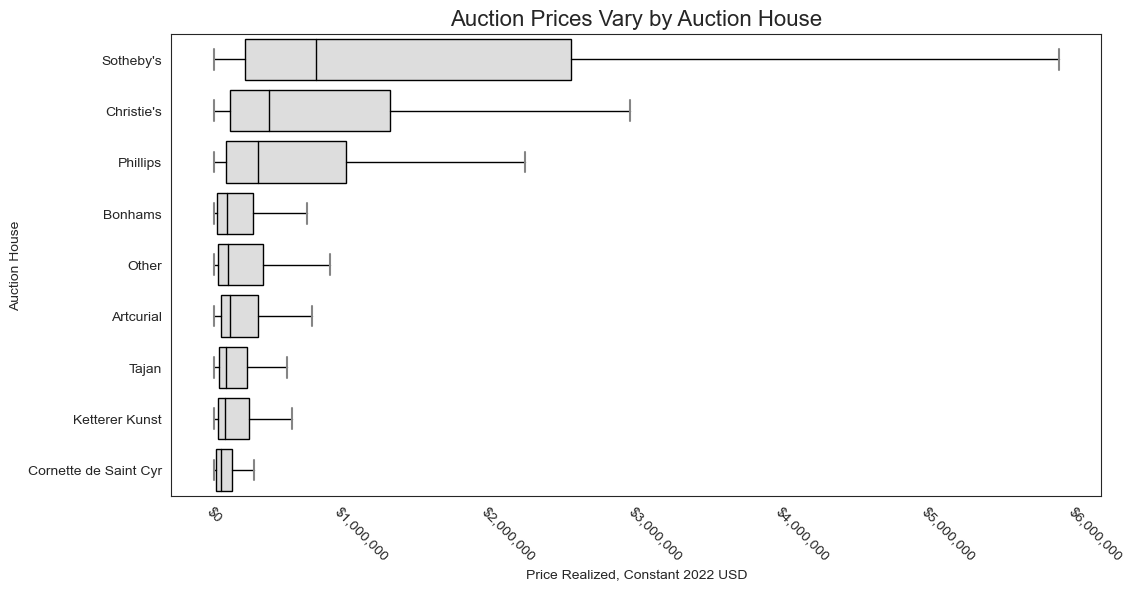

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))


sns.boxplot(
    data=data,
    y='auction_house_name_reduced',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops        

)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Auction Prices Vary by Auction House', fontsize=titlefontsize)
ax.set_xlabel('Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction House');

There are clear differences here, it seems, so the auction house seems like it will be a valuable predictor of price. But I'll want to reduce the cardinality, as I have above, for each individual artist market, since not all artists will have this same proportion of auction house representation.

## 12. Realized Price Varies by Auction Location
We have some data for auction location in this dataset. Let's see if that has any bearing on price.

In [27]:
# Count instances of each auction location
auction_loc_counts = data['auction_house_loc'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_locs = auction_loc_counts[auction_loc_counts > 400].index

# Create mask for top auction houses
is_top_auction_loc = data['auction_house_loc'].isin(top_auction_locs)

# Create new feature to reduce cardinality of existing feature
data['auction_loc_reduced'] = data.loc[is_top_auction_loc, 'auction_house_loc']
data.loc[~is_top_auction_loc, 'auction_loc_reduced'] = 'Other'

data[['auction_house_loc', 'auction_loc_reduced']].sample(10)

,auction_house_loc,auction_loc_reduced
709,New York,New York
22266,Paris,Paris
16905,New York,New York
2100,NaN,Other
47365,NaN,Other
20216,Paris - Drouot,Other
21247,Paris,Paris
42939,New York,New York
40657,NaN,Other
38892,Hong Kong,Hong Kong


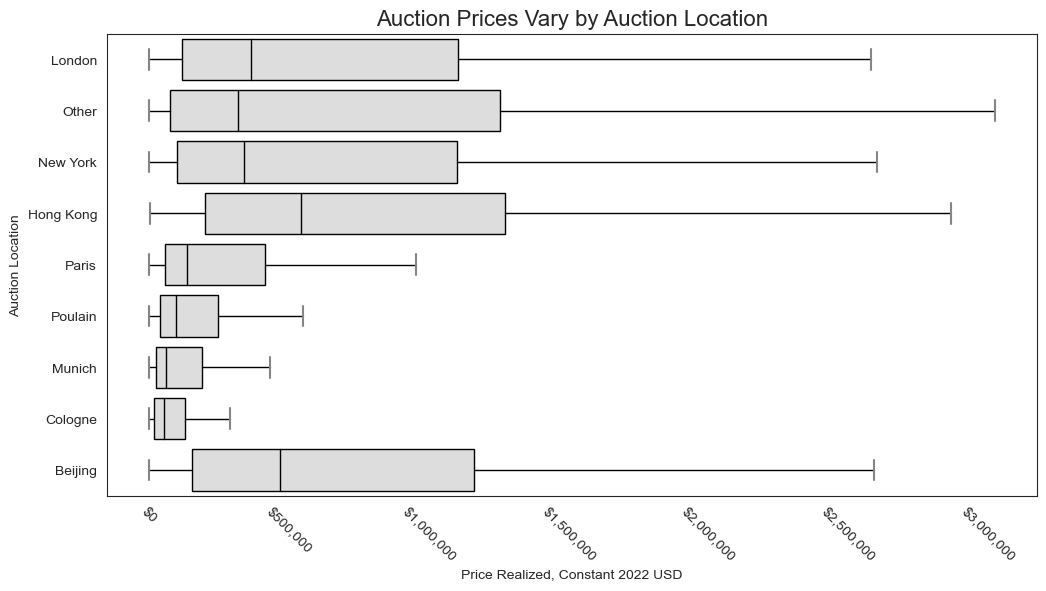

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))


sns.boxplot(
    data=data,
    y='auction_loc_reduced',
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    color=colors['gray'],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Auction Prices Vary by Auction Location', fontsize=titlefontsize)
ax.set_xlabel('Price Realized, Constant 2022 USD')
ax.set_ylabel('Auction Location');

Here, too, we can see important trends, since certain locations correlate with higher or lower prices.

## 13. Dead Artists Fetch Higher Prices than Living Artists (but it's complicated)
How does whether or not an artist is living at the time of auction affect its price? It feels rather obvious to me that prices will go up after an artist is no longer living--not only because there is no more work being created, but also because this implies that the artwork itself is older, which we've seen correlates positively with price.

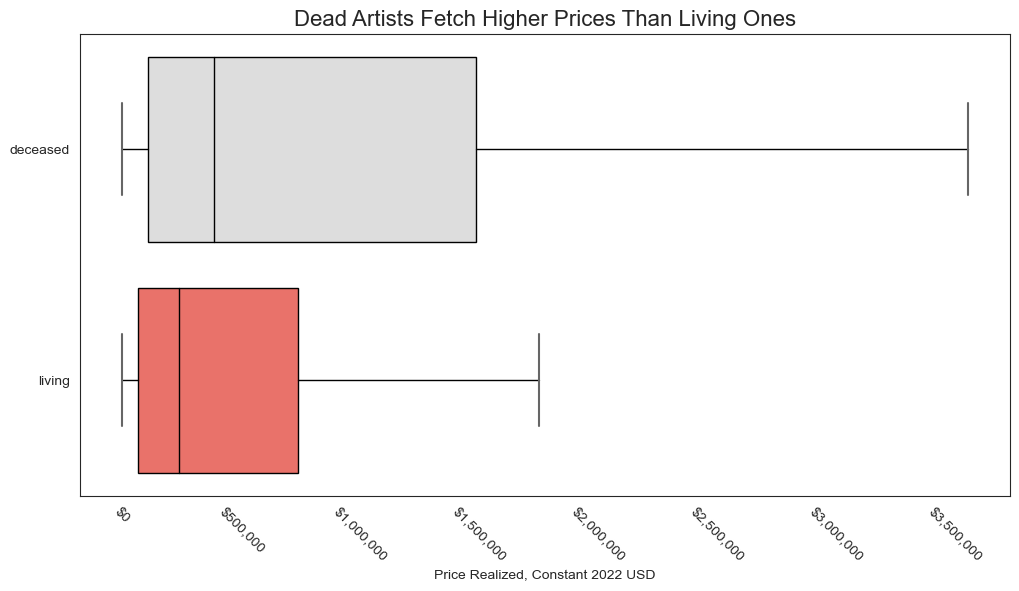

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=data,
    y=np.where(data['living'] == 0, 'deceased', 'living'),
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax,
    palette=[colors['gray'], colors['red']],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Dead Artists Fetch Higher Prices Than Living Ones', fontsize=titlefontsize)
ax.set_xlabel('Price Realized, Constant 2022 USD');

No surprises here.

I am curious, though, if there are trends when we examine prices as a function of how many years before or after an artist's death the auction took place:

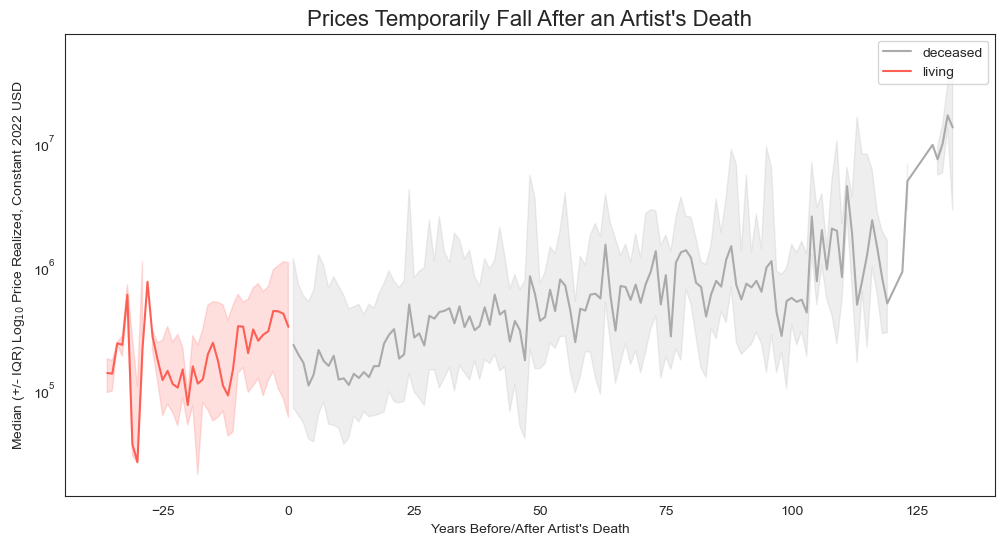

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create new feature
data['years_after_artist_death_of_auction'] = data['auction_year'] - data['death_year']

sns.lineplot(
    data=data[post1800],
    x='years_after_artist_death_of_auction',
    y='price_realized_USD_constant_2022',
    ax=ax,
    hue=np.where(data.loc[post1800, 'living'] == 0, 'deceased', 'living'),
    palette=[colors['darkgray'], colors['red']],
    estimator='median', errorbar=lambda x: (x.quantile(.25), x.quantile(.75))
)

ax.set_yscale('log')

ax.set_title('Prices Temporarily Fall After an Artist\'s Death', fontsize=titlefontsize)
ax.set_ylabel('Median (+/- IQR) Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_xlabel('Years Before/After Artist\'s Death');

This is interesting, since it helps us see that median price does rise during an artist's lifetime. For some unexpected reason, there is a precipitous drop in realized price immediately following an artist's death--my suspicion is that collectors aren't selling so much and, if they are, not major works. And within about 25 years, median prices have recovered and continue to rise.

Here's another way of considering this:

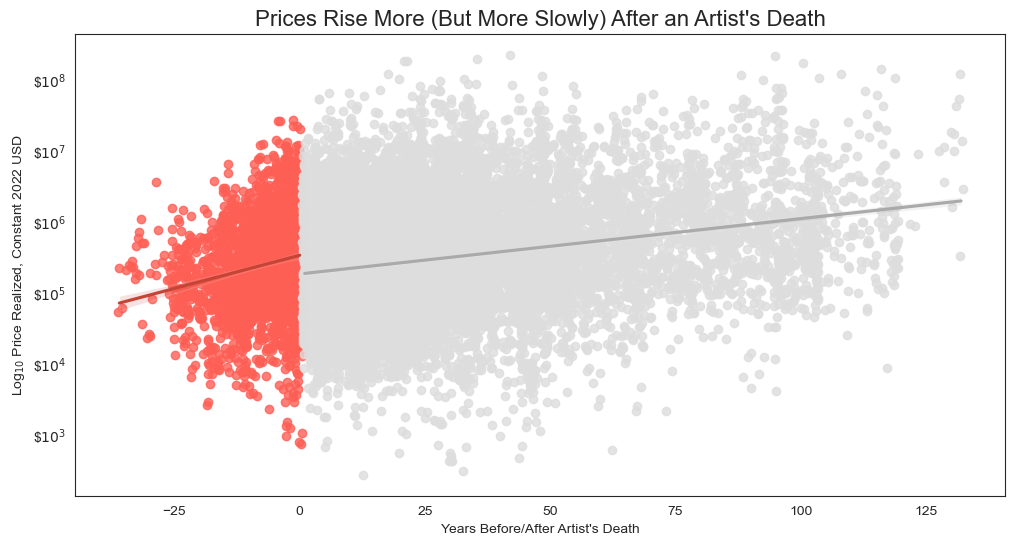

In [31]:
# Mask for work after 1800
post1800 = data['end_date'] > 1800
is_living = data['living'] == 1

fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    x=data.loc[post1800 & is_living,'years_after_artist_death_of_auction'],
    y=np.log10(data.loc[post1800 & is_living,'price_realized_USD_constant_2022']),
    ax=ax,
    color=colors['red'],
    line_kws=dict(color=colors['darkred']),
    x_jitter=.5
)

sns.regplot(
    x=data.loc[post1800 & ~is_living,'years_after_artist_death_of_auction'],
    y=np.log10(data.loc[post1800 & ~is_living,'price_realized_USD_constant_2022']),
    ax=ax,
    color=colors['gray'],
    line_kws=dict(color=colors['darkgray']),
    x_jitter=.5
)

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'))

ax.set_title('Prices Rise More (But More Slowly) After an Artist\'s Death', fontsize=titlefontsize)
ax.set_ylabel('Log$_{10}$ Price Realized, Constant 2022 USD')
ax.set_xlabel('Years Before/After Artist\'s Death');

What's interesting to note here is that prices generally seem to rise more quickly over the course of an artist's lifetime than they do after his/her death.

## 14. Artist Age at Auction and Price Realized are Positively Correlated

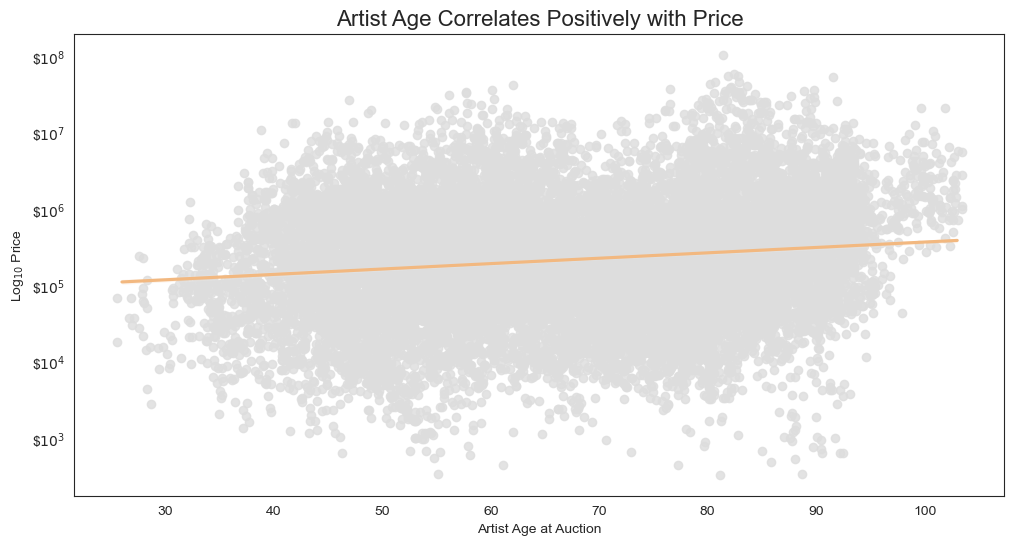

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=data['artist_age_at_auction'],
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    x_jitter=.5,
    ax=ax
)

ax.set_title('Artist Age Correlates Positively with Price', fontsize=titlefontsize)
ax.set_xlabel('Artist Age at Auction')
ax.set_ylabel('Log$_{10}$ Price')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

No surprises here. As an artist ages, auction prices go up, which makes sense since the artist's legacy is that much more secure in addition to the fact that his/her oeuvre is accruing value over time, independent of inflation, which we've already seen.

## 15. Realized Price and Artist Age at Artwork Completion are Mostly Uncorrelated
What about how an artist's age at the time a given artwork was completed correlates with realized price?

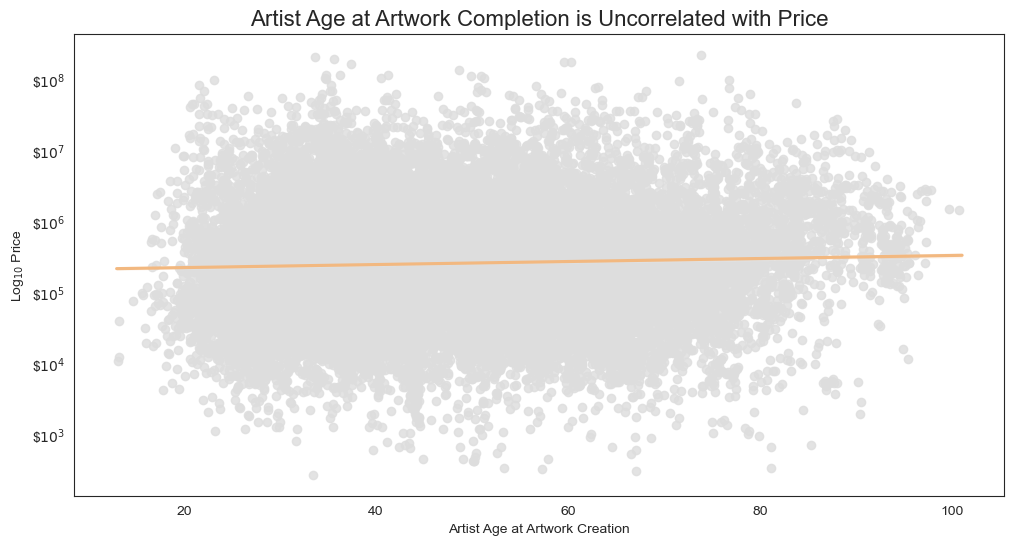

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    y=np.log10(data['price_realized_USD_constant_2022']),
    x=data['artist_age_at_artwork_completion'],
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    x_jitter=.5,
    ax=ax
)

ax.set_title('Artist Age at Artwork Completion is Uncorrelated with Price', fontsize=titlefontsize)
ax.set_xlabel('Artist Age at Artwork Creation')
ax.set_ylabel('Log$_{10}$ Price')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

I don't see any meaningful correlation here really, but my intuition is that this may be correlated, negatively or positively, for different artists where the market favors, for instance, early career work or late career work, etc.

## 16. Realized Price and Artwork Age at Auction are Postively Correlated

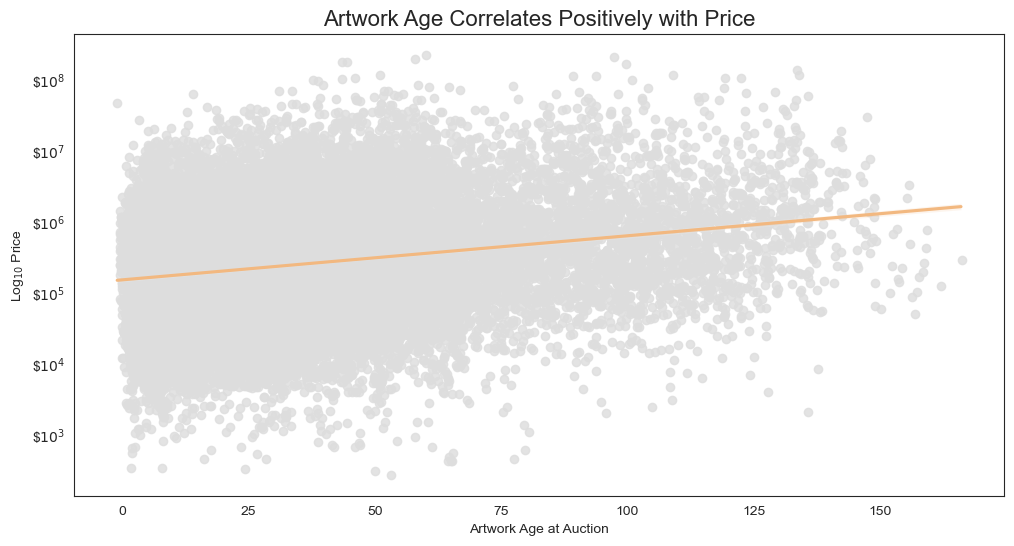

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    y=np.log10(data.loc[post1800, 'price_realized_USD_constant_2022']),
    x=data.loc[post1800, 'artwork_age_at_auction'],
    line_kws=dict(color=colors['orange']),
    color=colors['gray'],
    x_jitter=.5,
    ax=ax
)

ax.set_title('Artwork Age Correlates Positively with Price', fontsize=titlefontsize)
ax.set_xlabel('Artwork Age at Auction')
ax.set_ylabel('Log$_{10}$ Price')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('\$$10^{x:,.0f}$'));

And this, too, looks like what we'd expect: Older artworks fetch higher prices.